<a href="https://colab.research.google.com/github/JeongJeong-code/P6_market_place/blob/main/text_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from google.colab import files
import pandas as pd
import seaborn as sns
import os.path
import missingno as mi
import re
import sklearn as sk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import KernelPCA
from sklearn.cluster import (AgglomerativeClustering,
                             KMeans, DBSCAN, SpectralClustering)
from sklearn.metrics import davies_bouldin_score, silhouette_score
! {sys.executable} -m pip install ipynb

import cv2 as cv
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/df1_test.csv'
df1_test= pd.read_csv(url)
print(len(df1_test))
df1_test =df1_test[df1_test['image'] !='9743e6d1c9f3180483825fe4d2e97836.jpg']
print(len(df1_test))

928
927


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem
import string

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenize_desc = pd.Series(df1_test.description.str.lower().apply(tokenizer.tokenize),name ='tokenize_desc')

In [ ]:
all_words = [word for tokens in tokenize_desc for word in tokens]
from collections import Counter
count_all_words = Counter(all_words)
#count_all_words.most_common(100)

In [ ]:
stopword_list = nltk_stop_words = nltk.corpus.stopwords.words('english') + list(count_all_words.most_common(100))


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(df1_test.categories),name='class_labels')




In [ ]:
list_labels = y
list_tokens = tokenize_desc

In [ ]:
list_tokens

0      [key, features, of, elegance, polyester, multi...
1      [specifications, of, sathiyas, cotton, bath, t...
2      [key, features, of, eurospa, cotton, terry, fa...
3      [key, features, of, santosh, royal, fashion, c...
4      [key, features, of, jaipur, print, cotton, flo...
                             ...                        
923    [oren, empower, extra, large, self, adhesive, ...
924    [wallmantra, large, vinyl, sticker, sticker, p...
925    [buy, uberlyfe, extra, large, pigmented, polyv...
926    [buy, wallmantra, medium, vinyl, sticker, stic...
927    [buy, uberlyfe, large, vinyl, sticker, for, rs...
Name: tokenize_desc, Length: 927, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(df1_test.description,y, test_size=0.1, random_state=40)
X_train =df1_test.description
y_train = y

In [ ]:
X_train[:10]

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
5    Maserati Time R8851116001 Analog Watch  - For ...
6    Camerii WM64 Elegance Analog Watch  - For Men,...
7    T STAR UFT-TSW-005-BK-BR Analog Watch  - For B...
8    Alfajr WY16B Youth Digital Watch  - For Men, B...
9    TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...
Name: description, dtype: object

In [ ]:
df1_test.head()

,Unnamed: 0,product_name,image,description,product_specifications,categories
0,0,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"{""product_specification""=>[{""key""=>""Brand"", ""v...",curtains & accessories
1,1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,"{""product_specification""=>[{""key""=>""Machine Wa...",baby bath & skin
2,2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,"{""product_specification""=>[{""key""=>""Material"",...",baby bath & skin
3,3,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,"{""product_specification""=>[{""key""=>""Brand"", ""v...",bed linen
4,4,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,"{""product_specification""=>[{""key""=>""Machine Wa...",bed linen


In [ ]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()

dico = []
prob = []
for leaf in train.image:
    img = cv2.imread(img_path +'/'+ str(leaf),cv2.IMREAD_GRAYSCALE)
    orb = cv.ORB_create()
    kp = orb.detect(img,None)

    kp, des = orb.compute(img, kp)
    if len(kp)==0:
      prob.append(leaf)
      des= []
    


    for d in des:
      dico.append(d)

In [ ]:
np.shape(dico)

(444480, 32)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
k = np.size(labels) * 10

batch_size = np.size(os.listdir(img_path)) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(dico)


Init 1/3 with method k-means++
Inertia for init 1/3: 1181997842.0
Init 2/3 with method k-means++
Inertia for init 2/3: 1177235343.0
Init 3/3 with method k-means++
Inertia for init 3/3: 1182251282.0
Minibatch step 1/14110: mean batch inertia: 122904.86571428571
Minibatch step 2/14110: mean batch inertia: 101215.81560036541, ewa inertia: 101215.81560036541
Minibatch step 3/14110: mean batch inertia: 99827.99707424539, ewa inertia: 101196.14489067353
Minibatch step 4/14110: mean batch inertia: 97417.94023781223, ewa inertia: 101142.59324434212
Minibatch step 5/14110: mean batch inertia: 97286.80270576729, ewa inertia: 101087.94190853019
Minibatch step 6/14110: mean batch inertia: 97095.0101900156, ewa inertia: 101031.34675637151
Minibatch step 7/14110: mean batch inertia: 97161.26748822714, ewa inertia: 100976.4928944757
Minibatch step 8/14110: mean batch inertia: 96747.58149965109, ewa inertia: 100916.55300550992
Minibatch step 9/14110: mean batch inertia: 95599.43172301307, ewa inertia:

In [ ]:
kmeans.verbose = False
histo_list = []

for leaf in train.image:
    img = cv2.imread(img_path +'/'+ str(leaf) )
    kp, des = orb.detectAndCompute(img, None)

    histo = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+',stop_words=stopword_list)

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
#bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
#print(bow["test"][0].shape)

(927, 4814)


In [ ]:
X_train_word =count_vectorizer.fit_transform(X_train)

In [ ]:
np.shape(X_train_word)

(927, 4814)

In [ ]:
from scipy.sparse import hstack
np.shape(X_train_fin)

(927, 4814)

In [ ]:

X_train_word_df = pd.DataFrame.sparse.from_spmatrix(X_train_word)
X_train_image = pd.DataFrame(histo_list)
X = pd.concat([X_train_word_df,X_train_image],axis=1)

In [ ]:
X_train_word_df.head()

,0
0,"(0, 2635)\t1\n (0, 2031)\t2\n (0, 1850)\t4..."
1,"(0, 2031)\t1\n (0, 4131)\t1\n (0, 2212)\t1..."
2,"(0, 2635)\t1\n (0, 2031)\t2\n (0, 2366)\t1..."
3,"(0, 2635)\t1\n (0, 2031)\t1\n (0, 3050)\t2..."
4,"(0, 2635)\t1\n (0, 2031)\t1\n (0, 2106)\t3..."


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


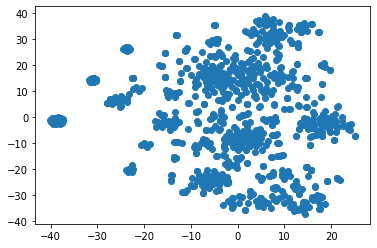

In [ ]:
from sklearn.manifold import TSNE
tsne_2d = TSNE(n_components=2, perplexity=40)# représentation du DataSet via TSNE
X_tsne = tsne_2d.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [ ]:
np.shape(X_tsne)

(927, 2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
gb= GaussianNB()
nb_classifier_tsne = MultinomialNB()
from sklearn.model_selection import cross_val_score
cross_val_score(gb, X_tsne,y_train, cv=5, scoring='accuracy',error_score = 'raise')



array([0.58602151, 0.66129032, 0.69189189, 0.71891892, 0.64324324])

In [ ]:
labels_=gb.fit(X_tsne,y_train).predict(X_tsne)
pd.Series(labels_).nunique()

17

In [ ]:
df1_test.categories.nunique()

24

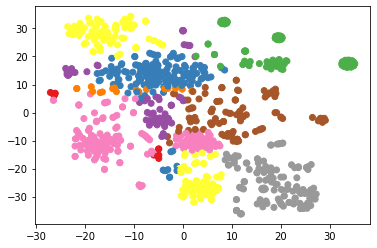

In [ ]:
results = np.c_[X_tsne,labels_]
pd_result = pd.DataFrame(results)
plt.scatter(pd_result[0], pd_result[1], c=pd_result[2], cmap='Set1')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+',stop_words=stopword_list)

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [ ]:
nb_classifier.fit(*bow["train"])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(nb_classifier, *bow["train"], cv=5, scoring='accuracy')

In [ ]:
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(*tfidf["train"])
cross_val_score(nb_classifier_tfidf, *tfidf["train"], cv=5, scoring='accuracy')

In [ ]:
#concat tfidf et vector_count
#kmeans pour retrouver les cat
#tsne pour reduc_dimension
#commencer le traitement d'image

Implémentation Kmeans


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [ ]:
kmeans= KMeans(n_clusters=24).fit(*bow["train"])

In [ ]:
pd.crosstab(index=y_train, columns=kmeans.labels_)